## SVM

引入模組

In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import svm #使用svm演算法
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

匯入資料

In [3]:
#from google.colab import files
#files.upload()

In [4]:
df = pd.read_csv('training_X_binary-2%_700詞.csv', index_col=0)
#df = pd.read_csv('training_X_times-2%_700詞.csv', index_col=0)

In [5]:
df

,短多,紙類,年後,董監,盛餘,允強,造紙類,推薦,股三大指,年封關,...,再創新高股,元創近個月,香港及陸股,生技月即將,分析師點名,台灣大賣超,台積電群創,線失而復得,元季增,郭英理表示
三大指,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
header = list(df.columns.values)
df.head

<bound method NDFrame.head of      短多  紙類  年後  董監  盛餘  允強  造紙類  推薦  股三大指  年封關  ...  再創新高股  元創近個月  香港及陸股  \
三大指                                              ...                        
0     0   0   0   0   0   0    0   0     0    0  ...      0      0      0   
0     0   0   0   0   0   0    0   0     0    0  ...      0      0      0   
0     1   0   1   0   0   0    0   0     0    0  ...      0      0      0   
0     0   0   0   0   0   0    0   1     0    0  ...      0      0      0   
1     0   0   0   0   0   0    0   0     1    0  ...      0      0      0   
..   ..  ..  ..  ..  ..  ..  ...  ..   ...  ...  ...    ...    ...    ...   
0     0   0   0   0   0   0    0   0     0    0  ...      0      0      0   
0     0   0   0   0   0   0    0   0     0    0  ...      0      0      0   
0     0   0   0   0   0   0    0   0     0    0  ...      0      0      0   
0     0   0   0   0   0   0    0   0     0    0  ...      0      0      0   
0     0   0   0   0   0   0    0   0     0    

In [7]:
df.info()
print(df.info)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3183 entries, 0 to 0
Columns: 1399 entries, 短多 to 郭英理表示
dtypes: int64(1399)
memory usage: 34.0 MB
<bound method DataFrame.info of      短多  紙類  年後  董監  盛餘  允強  造紙類  推薦  股三大指  年封關  ...  再創新高股  元創近個月  香港及陸股  \
三大指                                              ...                        
0     0   0   0   0   0   0    0   0     0    0  ...      0      0      0   
0     0   0   0   0   0   0    0   0     0    0  ...      0      0      0   
0     1   0   1   0   0   0    0   0     0    0  ...      0      0      0   
0     0   0   0   0   0   0    0   1     0    0  ...      0      0      0   
1     0   0   0   0   0   0    0   0     1    0  ...      0      0      0   
..   ..  ..  ..  ..  ..  ..  ...  ..   ...  ...  ...    ...    ...    ...   
0     0   0   0   0   0   0    0   0     0    0  ...      0      0      0   
0     0   0   0   0   0   0    0   0     0    0  ...      0      0      0   
0     0   0   0   0   0   0    0   0     0    0  .

資料準備

In [8]:
#轉成data frame來做操作 -> 我沒有很懂這個
#df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
#df.info()

In [9]:
df.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
x = df.values
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
target_list = []
for i in range(3183):
    if i <= 1692:
        target_list.append(1)
    else:
        target_list.append(0)

In [12]:
y = np.array(target_list)
y

array([1, 1, 1, ..., 0, 0, 0])

In [13]:
name = ["POS", "NEG"]
target_name = np.array(name)
target_name

array(['POS', 'NEG'], dtype='<U3')

將資料區分為訓練集與測試集(80% / 20%)

In [14]:
x = df.values 
y = np.array(target_list)

max_training_set_score: 0.8782403770620582
max_test_set_score: 0.7080062794348508
[[208 104]
 [ 82 243]]


Text(91.68, 0.5, 'predicted label')

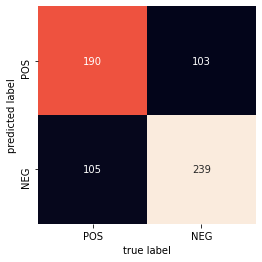

In [27]:
from sklearn.metrics import classification_report,confusion_matrix #載入classification report & confusion matrix
# 跑迴圈數次，看最大可以跑多少
Training_Set_Score = []
Test_Set_Score = []
Confusion_Matrix = []
max_training_set_score = float()
max_test_set_score = float()
max_confusion_matrix = []

for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)  # 套件功能把資料打散分為訓練集跟測試集
    
    from sklearn import svm #使用svm演算法
    from sklearn.svm import SVC
    #svm = svm.SVC(kernel = 'linear', C = 10, gamma = 0.001)
    svm = svm.SVC(kernel = 'linear', C = 1, gamma = 'auto')
    svm.fit(X_train,y_train)
    pred = svm.predict(X_test) #預測
        
    # 記錄每次的結果,可以print出來看
    #Training_Set_Score.append(modelm.score(X_train,y_train))
    #Test_Set_Score.append(modelm.score(X_test,y_test))
    #Confusion_Matrix.append(confusion_matrix(y_test, labels))
    
    test_set_score = svm.score(X_test,y_test)
    if test_set_score > max_test_set_score:
        max_test_set_score = test_set_score
        max_training_set_score = svm.score(X_train,y_train)
        max_confusion_matrix = confusion_matrix(y_test, pred)
    

#print(Training_Set_Score)
#print(Test_Set_Score)
#print(Confusion_Matrix)

print('max_training_set_score:',max_training_set_score)
print('max_test_set_score:',max_test_set_score)
print(max_confusion_matrix)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_name, yticklabels=target_name)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

模型建立

In [56]:
from sklearn import svm #使用svm演算法
from sklearn.svm import SVC
#載入Support Vector Classifier套件
#如果是連續型的資料，可以採用svm.SVR(Support Vector Regression)
#線性還有一種svm.LinearSVC (Linear Support Vector Classification)，其中演算法跟採用svm.SVC(kernel=’linear’)是不一樣的
#樣本非常龐大時，用svm.LinearSVC的運算速度會比較快
#針對連續型資料同樣可以採用svm.LinearSVR (Linear Support Vector Regression)

#svm = svm.SVC(kernel = 'linear', C = 1, gamma = 'auto')
svm = svm.SVC(kernel = 'linear', C = 10, gamma = 0.001)

#核函數 kernel: 可以選擇各式各樣的核函數，包含 linear（線性）、poly（多項式）、rbf（高斯）、sigmoid等等，也可以自訂，以符合資料的需求
#C為懲罰係數，愈大代表錯誤的容忍程度愈低，在訓練集樣本中會區分的愈精細，因此設定太大容易造成過度擬和的問題。反之，設定太小則會造成低度擬合的問題。若沒設定，模型中預設為1
#參數gamma決定支援向量的多寡，並影響訓練速度與預測速度 。此參數有兩個自動運算選擇，分別為’scale’與’auto’，或是也可以直接指定數值，未設定下預設為’scale’


In [57]:
#使用Support Vector Classifier來建立模型
svm.fit(X_train,y_train)
pred = svm.predict(X_test) #預測

In [58]:
svm

SVC(C=10, gamma=0.001, kernel='linear')

In [59]:
#準確度評估
print(svm.score(X_train,y_train))
print(svm.score(X_test, y_test))

0.9933228593872742
0.6373626373626373


測試SVM演算法的好壞

In [38]:
from sklearn.metrics import classification_report,confusion_matrix #載入classification report & confusion matrix
print(confusion_matrix(y_test,pred))
print('\n')

[[183 106]
 [128 220]]




Text(91.68, 0.5, 'predicted label')

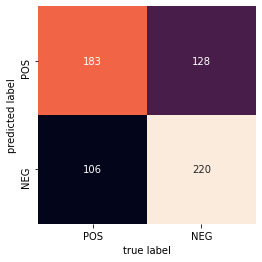

In [39]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_name, yticklabels=target_name)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.60      0.63      0.61       287
           1       0.68      0.66      0.67       350

    accuracy                           0.65       637
   macro avg       0.64      0.64      0.64       637
weighted avg       0.65      0.65      0.65       637



In [112]:
#看結果，如果分類結果都只出現在特定的類別，就要修正模型。model.fit(X_train,y_train)輸出結果中有看到有許多參數可以修改，像是C及gamma值。
#由於要選到適合的C值及gamma值，有好幾種排列組合，這時候就可以使用格狀組合的參數來找到最佳結果的Gridsearch。

額外補充 - GridSearch

In [113]:
#載入GridSearchCV
from sklearn.model_selection import GridSearchCV

In [114]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [115]:
#GridSearchCV算是一個meta-estimator，參數中帶有estimator，像是SVC。重點是會創造一個新的estimator，但又表現得一模一樣，也就是estimator=SVC時，就是作為分類器
grid = GridSearchCV(SVC(),param_grid,verbose=3)
#Verbose可設定為任一整數，它只是代表數字越高，文字解釋越多

In [116]:
grid.fit(X_train,y_train) #利用剛剛設定的參數來找到最適合的模型

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .................................C=0.1, gamma=1; total time=  16.3s
[CV 2/5] END .................................C=0.1, gamma=1; total time=  16.5s
[CV 3/5] END .................................C=0.1, gamma=1; total time=  16.0s
[CV 4/5] END .................................C=0.1, gamma=1; total time=  16.2s
[CV 5/5] END .................................C=0.1, gamma=1; total time=  16.0s
[CV 1/5] END ...............................C=0.1, gamma=0.1; total time=  16.9s
[CV 2/5] END ...............................C=0.1, gamma=0.1; total time=  24.0s
[CV 3/5] END ...............................C=0.1, gamma=0.1; total time=  16.9s
[CV 4/5] END ...............................C=0.1, gamma=0.1; total time=  15.8s
[CV 5/5] END ...............................C=0.1, gamma=0.1; total time=  15.5s
[CV 1/5] END ..............................C=0.1, gamma=0.01; total time=  16.5s
[CV 2/5] END ..............................C=0.

[CV 2/5] END ................................C=1000, gamma=1; total time=  15.1s
[CV 3/5] END ................................C=1000, gamma=1; total time=  16.3s
[CV 4/5] END ................................C=1000, gamma=1; total time=  15.3s
[CV 5/5] END ................................C=1000, gamma=1; total time=  15.1s
[CV 1/5] END ..............................C=1000, gamma=0.1; total time=  14.7s
[CV 2/5] END ..............................C=1000, gamma=0.1; total time=  15.1s
[CV 3/5] END ..............................C=1000, gamma=0.1; total time=  14.9s
[CV 4/5] END ..............................C=1000, gamma=0.1; total time=  14.7s
[CV 5/5] END ..............................C=1000, gamma=0.1; total time=  14.7s
[CV 1/5] END .............................C=1000, gamma=0.01; total time=  13.4s
[CV 2/5] END .............................C=1000, gamma=0.01; total time=  13.3s
[CV 3/5] END .............................C=1000, gamma=0.01; total time=  15.8s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [117]:
grid.best_estimator_ #顯示最佳estimator參數

SVC(C=10, gamma=0.001)

In [118]:
grid_predictions = grid.predict(X_test) #利用剛剛的最佳參考再重新預測測試組

In [119]:
#評估新參考的預測結果好壞
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[231 156]
 [163 327]]


              precision    recall  f1-score   support

           0       0.59      0.60      0.59       387
           1       0.68      0.67      0.67       490

    accuracy                           0.64       877
   macro avg       0.63      0.63      0.63       877
weighted avg       0.64      0.64      0.64       877



Text(91.68, 0.5, 'predicted label')

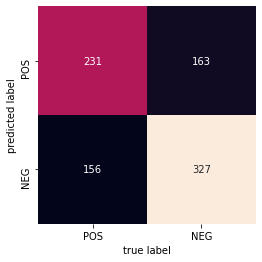

In [120]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, grid_predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_name, yticklabels=target_name)
plt.xlabel('true label')
plt.ylabel('predicted label')